In [2]:
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import timedelta
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
power_plant = pd.read_csv("solorE/site_info.csv")
energy_per = pd.read_csv("solorE/energy.csv")
dangjin_forcast = pd.read_csv("solorE/dangjin_fcst_data.csv")
dangjin_around = pd.read_csv("solorE/dangjin_obs_data.csv")
ulsan_forcast = pd.read_csv("solorE/ulsan_fcst_data.csv")
ulsan_around = pd.read_csv("solorE/ulsan_obs_data.csv")

In [3]:
power_plant

,Id,Capacity,Address,InstallationAngle,IncidentAngle,Latitude,Longitude
0,당진수상태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
1,당진자재창고태양광,0.7,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
2,당진태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
3,울산태양광,0.5,울산광역시 남구 용잠로 623,20.0,20.0,35.477651,129.380778


In [4]:
energy_per.head()

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0


In [5]:
dangjin_forcast.head()

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0


In [6]:
dangjin_around.head()

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN


In [7]:
ulsan_forcast.head()

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,8.0,20.0,14.0,298.0,2.0
1,2018-03-01 11:00:00,7.0,4.0,20.0,4.3,298.0,2.0
2,2018-03-01 11:00:00,10.0,3.0,30.0,1.9,309.0,2.0
3,2018-03-01 11:00:00,13.0,0.0,40.0,1.5,318.0,2.0
4,2018-03-01 11:00:00,16.0,-1.0,45.0,1.8,308.0,2.0


In [8]:
ulsan_around.head()

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,152,울산,2018-03-01 00:00,8.2,3.9,340.0,98.0,10.0
1,152,울산,2018-03-01 01:00,7.0,4.1,320.0,97.0,10.0
2,152,울산,2018-03-01 02:00,6.5,5.9,290.0,80.0,NaN
3,152,울산,2018-03-01 03:00,6.2,4.6,320.0,79.0,3.0
4,152,울산,2018-03-01 04:00,6.7,4.5,320.0,73.0,1.0


In [9]:
dangjin_forcast.isnull().sum()

Forecast time    0
forecast         0
Temperature      0
Humidity         0
WindSpeed        0
WindDirection    0
Cloud            0
dtype: int64

In [10]:
dangjin_forcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162208 entries, 0 to 162207
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Forecast time  162208 non-null  object 
 1   forecast       162208 non-null  float64
 2   Temperature    162208 non-null  float64
 3   Humidity       162208 non-null  float64
 4   WindSpeed      162208 non-null  float64
 5   WindDirection  162208 non-null  float64
 6   Cloud          162208 non-null  float64
dtypes: float64(6), object(1)
memory usage: 8.7+ MB


In [11]:
dangjin_forcast['Forecast time'] = pd.to_datetime(dangjin_forcast['Forecast time'])
dangjin_forcast['forecast'] = dangjin_forcast['forecast'].astype(int)

In [12]:
dangjin_forcast['Forecast time'] = dangjin_forcast['Forecast time'] + pd.to_timedelta(dangjin_forcast['forecast'],unit='h')
dangjin_forcast['Forecast time']

0        2018-03-01 15:00:00
1        2018-03-01 18:00:00
2        2018-03-01 21:00:00
3        2018-03-02 00:00:00
4        2018-03-02 03:00:00
                 ...        
162203   2021-03-03 12:00:00
162204   2021-03-03 15:00:00
162205   2021-03-03 18:00:00
162206   2021-03-03 21:00:00
162207   2021-03-04 00:00:00
Name: Forecast time, Length: 162208, dtype: datetime64[ns]

In [13]:
dangjin_forcast.drop('forecast',axis=1, inplace=True)
dangjin_forcast.rename(columns={'Forecast time':'time'}, inplace=True)
dangjin_forcast.head()

,time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 15:00:00,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 18:00:00,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 21:00:00,-2.0,60.0,6.7,323.0,1.0
3,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
4,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0


In [14]:
energy_per.isnull().sum()

time                  0
dangjin_floating     24
dangjin_warehouse    48
dangjin               0
ulsan                 0
dtype: int64

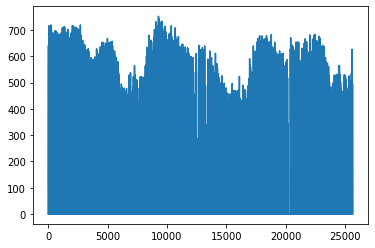

In [15]:
energy_per['dangjin_floating'].plot()

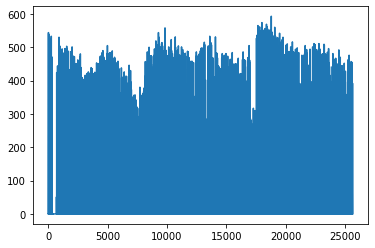

In [16]:
energy_per['dangjin_warehouse'].plot()

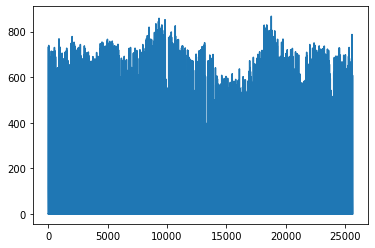

In [17]:
energy_per['dangjin'].plot()

In [18]:
energy_per['dangjin_floating'].fillna(method = 'ffill', inplace = True)
energy_per['dangjin_warehouse'].fillna(method = 'ffill', inplace = True)
energy_per.isnull().sum()

time                 0
dangjin_floating     0
dangjin_warehouse    0
dangjin              0
ulsan                0
dtype: int64

In [19]:
dangjin_forcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162208 entries, 0 to 162207
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   time           162208 non-null  datetime64[ns]
 1   Temperature    162208 non-null  float64       
 2   Humidity       162208 non-null  float64       
 3   WindSpeed      162208 non-null  float64       
 4   WindDirection  162208 non-null  float64       
 5   Cloud          162208 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 7.4 MB


In [20]:
dangjin_energy.info()

NameError: name 'dangjin_energy' is not defined

In [ ]:
energy_per['time']

In [21]:
energy_per[['date','time']] = energy_per['time'].str.split(expand=True)
energy_per['time'] = pd.to_datetime(energy_per.date) + pd.to_timedelta(energy_per.time)
energy_per.drop('date',axis = 1,inplace=True)
energy_per

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 01:00:00,0.0,0.0,0,0
1,2018-03-01 02:00:00,0.0,0.0,0,0
2,2018-03-01 03:00:00,0.0,0.0,0,0
3,2018-03-01 04:00:00,0.0,0.0,0,0
4,2018-03-01 05:00:00,0.0,0.0,0,0
...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0
25628,2021-01-31 21:00:00,0.0,0.0,0,0
25629,2021-01-31 22:00:00,0.0,0.0,0,0
25630,2021-01-31 23:00:00,0.0,0.0,0,0


In [22]:
dangjin_forcast['time'] = dangjin_forcast['time'].astype(object)
energy_per['time'] = energy_per['time'].astype(object)
dangjin_forcast['time']
energy_per['time']

0        2018-03-01 01:00:00
1        2018-03-01 02:00:00
2        2018-03-01 03:00:00
3        2018-03-01 04:00:00
4        2018-03-01 05:00:00
                ...         
25627    2021-01-31 20:00:00
25628    2021-01-31 21:00:00
25629    2021-01-31 22:00:00
25630    2021-01-31 23:00:00
25631    2021-02-01 00:00:00
Name: time, Length: 25632, dtype: object

In [23]:
dangjin_df = pd.merge(dangjin_forcast,energy_per,on='time',how='left')
dangjin_df['time'] = pd.to_datetime(dangjin_df['time'])
dangjin_df

,time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 15:00:00,0.0,60.0,7.3,309.0,2.0,641.0,496.0,672.0,318.0
1,2018-03-01 18:00:00,-2.0,60.0,7.1,314.0,1.0,134.0,80.0,110.0,30.0
2,2018-03-01 21:00:00,-2.0,60.0,6.7,323.0,1.0,0.0,0.0,0.0,0.0
3,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0,0.0,0.0,0.0,0.0
4,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
162203,2021-03-03 12:00:00,7.0,40.0,3.2,187.0,1.0,NaN,NaN,NaN,NaN
162204,2021-03-03 15:00:00,8.0,40.0,4.5,217.0,1.0,NaN,NaN,NaN,NaN
162205,2021-03-03 18:00:00,5.0,55.0,2.2,210.0,1.0,NaN,NaN,NaN,NaN
162206,2021-03-03 21:00:00,1.0,80.0,1.9,164.0,1.0,NaN,NaN,NaN,NaN


In [24]:
dangjin_df['time']

0        2018-03-01 15:00:00
1        2018-03-01 18:00:00
2        2018-03-01 21:00:00
3        2018-03-02 00:00:00
4        2018-03-02 03:00:00
                 ...        
162203   2021-03-03 12:00:00
162204   2021-03-03 15:00:00
162205   2021-03-03 18:00:00
162206   2021-03-03 21:00:00
162207   2021-03-04 00:00:00
Name: time, Length: 162208, dtype: datetime64[ns]

In [25]:
dangjin_df.drop_duplicates(inplace=True)
dangjin_df

,time,Temperature,Humidity,WindSpeed,WindDirection,Cloud,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 15:00:00,0.0,60.0,7.3,309.0,2.0,641.0,496.0,672.0,318.0
1,2018-03-01 18:00:00,-2.0,60.0,7.1,314.0,1.0,134.0,80.0,110.0,30.0
2,2018-03-01 21:00:00,-2.0,60.0,6.7,323.0,1.0,0.0,0.0,0.0,0.0
3,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0,0.0,0.0,0.0,0.0
4,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
162182,2021-03-03 12:00:00,7.0,40.0,3.2,187.0,1.0,NaN,NaN,NaN,NaN
162183,2021-03-03 15:00:00,8.0,40.0,4.5,217.0,1.0,NaN,NaN,NaN,NaN
162184,2021-03-03 18:00:00,5.0,55.0,2.2,210.0,1.0,NaN,NaN,NaN,NaN
162185,2021-03-03 21:00:00,1.0,80.0,1.9,164.0,1.0,NaN,NaN,NaN,NaN


In [26]:
for i in dangjin_df.index:
    print(dangjin_df.loc[i,'time'])

2018-03-01 15:00:00
2018-03-01 18:00:00
2018-03-01 21:00:00
2018-03-02 00:00:00
2018-03-02 03:00:00
2018-03-02 06:00:00
2018-03-02 09:00:00
2018-03-02 12:00:00
2018-03-02 15:00:00
2018-03-02 18:00:00
2018-03-02 21:00:00
2018-03-03 00:00:00
2018-03-03 03:00:00
2018-03-03 06:00:00
2018-03-03 09:00:00
2018-03-03 12:00:00
2018-03-03 15:00:00
2018-03-03 18:00:00
2018-03-03 21:00:00
2018-03-04 00:00:00
2018-03-01 21:00:00
2018-03-02 00:00:00
2018-03-02 03:00:00
2018-03-02 06:00:00
2018-03-02 09:00:00
2018-03-02 12:00:00
2018-03-02 15:00:00
2018-03-02 18:00:00
2018-03-02 21:00:00
2018-03-03 00:00:00
2018-03-03 03:00:00
2018-03-03 06:00:00
2018-03-03 09:00:00
2018-03-03 12:00:00
2018-03-03 15:00:00
2018-03-03 18:00:00
2018-03-03 21:00:00
2018-03-04 00:00:00
2018-03-02 09:00:00
2018-03-02 12:00:00
2018-03-02 15:00:00
2018-03-02 18:00:00
2018-03-02 21:00:00
2018-03-03 00:00:00
2018-03-03 03:00:00
2018-03-03 06:00:00
2018-03-03 09:00:00
2018-03-03 12:00:00
2018-03-03 15:00:00
2018-03-03 18:00:00


2018-04-03 21:00:00
2018-04-04 00:00:00
2018-04-01 21:00:00
2018-04-02 00:00:00
2018-04-02 03:00:00
2018-04-02 06:00:00
2018-04-02 09:00:00
2018-04-02 12:00:00
2018-04-02 15:00:00
2018-04-02 18:00:00
2018-04-02 21:00:00
2018-04-03 00:00:00
2018-04-03 03:00:00
2018-04-03 06:00:00
2018-04-03 09:00:00
2018-04-03 12:00:00
2018-04-03 15:00:00
2018-04-03 18:00:00
2018-04-03 21:00:00
2018-04-04 00:00:00
2018-04-02 09:00:00
2018-04-02 12:00:00
2018-04-02 15:00:00
2018-04-02 18:00:00
2018-04-02 21:00:00
2018-04-03 00:00:00
2018-04-03 03:00:00
2018-04-03 06:00:00
2018-04-03 09:00:00
2018-04-03 12:00:00
2018-04-03 15:00:00
2018-04-03 18:00:00
2018-04-03 21:00:00
2018-04-04 00:00:00
2018-04-04 03:00:00
2018-04-04 06:00:00
2018-04-04 09:00:00
2018-04-04 12:00:00
2018-04-04 15:00:00
2018-04-04 18:00:00
2018-04-04 21:00:00
2018-04-05 00:00:00
2018-04-02 21:00:00
2018-04-03 00:00:00
2018-04-03 03:00:00
2018-04-03 06:00:00
2018-04-03 09:00:00
2018-04-03 12:00:00
2018-04-03 15:00:00
2018-04-03 18:00:00


2018-04-30 09:00:00
2018-04-30 12:00:00
2018-04-30 15:00:00
2018-04-30 18:00:00
2018-04-30 21:00:00
2018-05-01 00:00:00
2018-05-01 03:00:00
2018-05-01 06:00:00
2018-05-01 09:00:00
2018-05-01 12:00:00
2018-05-01 15:00:00
2018-05-01 18:00:00
2018-05-01 21:00:00
2018-05-02 00:00:00
2018-04-30 09:00:00
2018-04-30 12:00:00
2018-04-30 15:00:00
2018-04-30 18:00:00
2018-04-30 21:00:00
2018-05-01 00:00:00
2018-05-01 03:00:00
2018-05-01 06:00:00
2018-05-01 09:00:00
2018-05-01 12:00:00
2018-05-01 15:00:00
2018-05-01 18:00:00
2018-05-01 21:00:00
2018-05-02 00:00:00
2018-05-02 03:00:00
2018-05-02 06:00:00
2018-05-02 09:00:00
2018-05-02 12:00:00
2018-05-02 15:00:00
2018-05-02 18:00:00
2018-05-02 21:00:00
2018-05-03 00:00:00
2018-04-30 21:00:00
2018-05-01 00:00:00
2018-05-01 03:00:00
2018-05-01 06:00:00
2018-05-01 09:00:00
2018-05-01 12:00:00
2018-05-01 15:00:00
2018-05-01 18:00:00
2018-05-01 21:00:00
2018-05-02 00:00:00
2018-05-02 03:00:00
2018-05-02 06:00:00
2018-05-02 09:00:00
2018-05-02 12:00:00


2018-05-30 21:00:00
2018-05-31 00:00:00
2018-05-28 15:00:00
2018-05-28 18:00:00
2018-05-28 21:00:00
2018-05-29 00:00:00
2018-05-28 21:00:00
2018-05-29 00:00:00
2018-05-29 03:00:00
2018-05-29 06:00:00
2018-05-29 09:00:00
2018-05-29 12:00:00
2018-05-29 15:00:00
2018-05-29 18:00:00
2018-05-29 21:00:00
2018-05-30 00:00:00
2018-05-30 03:00:00
2018-05-30 06:00:00
2018-05-30 09:00:00
2018-05-30 12:00:00
2018-05-30 15:00:00
2018-05-30 18:00:00
2018-05-30 21:00:00
2018-05-31 00:00:00
2018-05-29 09:00:00
2018-05-29 12:00:00
2018-05-29 15:00:00
2018-05-29 18:00:00
2018-05-29 21:00:00
2018-05-30 00:00:00
2018-05-30 03:00:00
2018-05-30 06:00:00
2018-05-30 09:00:00
2018-05-30 12:00:00
2018-05-30 15:00:00
2018-05-30 18:00:00
2018-05-30 21:00:00
2018-05-31 00:00:00
2018-05-31 03:00:00
2018-05-31 06:00:00
2018-05-31 09:00:00
2018-05-31 12:00:00
2018-05-31 15:00:00
2018-05-31 18:00:00
2018-05-31 21:00:00
2018-06-01 00:00:00
2018-05-29 21:00:00
2018-05-30 00:00:00
2018-05-30 03:00:00
2018-05-30 06:00:00


2018-06-15 18:00:00
2018-06-15 21:00:00
2018-06-16 00:00:00
2018-06-16 03:00:00
2018-06-16 06:00:00
2018-06-16 09:00:00
2018-06-16 12:00:00
2018-06-16 15:00:00
2018-06-16 18:00:00
2018-06-16 21:00:00
2018-06-17 00:00:00
2018-06-17 03:00:00
2018-06-17 06:00:00
2018-06-17 09:00:00
2018-06-17 12:00:00
2018-06-17 15:00:00
2018-06-17 18:00:00
2018-06-17 21:00:00
2018-06-18 00:00:00
2018-06-15 21:00:00
2018-06-16 00:00:00
2018-06-16 03:00:00
2018-06-16 06:00:00
2018-06-16 09:00:00
2018-06-16 12:00:00
2018-06-16 15:00:00
2018-06-16 18:00:00
2018-06-16 21:00:00
2018-06-17 00:00:00
2018-06-17 03:00:00
2018-06-17 06:00:00
2018-06-17 09:00:00
2018-06-17 12:00:00
2018-06-17 15:00:00
2018-06-17 18:00:00
2018-06-17 21:00:00
2018-06-18 00:00:00
2018-06-16 09:00:00
2018-06-16 12:00:00
2018-06-16 15:00:00
2018-06-16 18:00:00
2018-06-16 21:00:00
2018-06-17 00:00:00
2018-06-17 03:00:00
2018-06-17 06:00:00
2018-06-17 09:00:00
2018-06-17 12:00:00
2018-06-17 15:00:00
2018-06-17 18:00:00
2018-06-17 21:00:00


2018-07-15 21:00:00
2018-07-16 00:00:00
2018-07-16 03:00:00
2018-07-16 06:00:00
2018-07-16 09:00:00
2018-07-16 12:00:00
2018-07-16 15:00:00
2018-07-16 18:00:00
2018-07-16 21:00:00
2018-07-17 00:00:00
2018-07-15 09:00:00
2018-07-15 12:00:00
2018-07-15 15:00:00
2018-07-15 18:00:00
2018-07-15 21:00:00
2018-07-16 00:00:00
2018-07-16 03:00:00
2018-07-16 06:00:00
2018-07-16 09:00:00
2018-07-16 12:00:00
2018-07-16 15:00:00
2018-07-16 18:00:00
2018-07-16 21:00:00
2018-07-17 00:00:00
2018-07-17 03:00:00
2018-07-17 06:00:00
2018-07-17 09:00:00
2018-07-17 12:00:00
2018-07-17 15:00:00
2018-07-17 18:00:00
2018-07-17 21:00:00
2018-07-18 00:00:00
2018-07-15 21:00:00
2018-07-16 00:00:00
2018-07-16 03:00:00
2018-07-16 06:00:00
2018-07-16 09:00:00
2018-07-16 12:00:00
2018-07-16 15:00:00
2018-07-16 18:00:00
2018-07-16 21:00:00
2018-07-17 00:00:00
2018-07-17 03:00:00
2018-07-17 06:00:00
2018-07-17 09:00:00
2018-07-17 12:00:00
2018-07-17 15:00:00
2018-07-17 18:00:00
2018-07-17 21:00:00
2018-07-18 00:00:00


2018-08-12 00:00:00
2018-08-12 03:00:00
2018-08-12 06:00:00
2018-08-12 09:00:00
2018-08-12 12:00:00
2018-08-12 15:00:00
2018-08-12 18:00:00
2018-08-12 21:00:00
2018-08-13 00:00:00
2018-08-13 03:00:00
2018-08-13 06:00:00
2018-08-13 09:00:00
2018-08-13 12:00:00
2018-08-13 15:00:00
2018-08-13 18:00:00
2018-08-13 21:00:00
2018-08-14 00:00:00
2018-08-12 09:00:00
2018-08-12 12:00:00
2018-08-12 15:00:00
2018-08-12 18:00:00
2018-08-12 21:00:00
2018-08-13 00:00:00
2018-08-13 03:00:00
2018-08-13 06:00:00
2018-08-13 09:00:00
2018-08-13 12:00:00
2018-08-13 15:00:00
2018-08-13 18:00:00
2018-08-13 21:00:00
2018-08-14 00:00:00
2018-08-14 03:00:00
2018-08-14 06:00:00
2018-08-14 09:00:00
2018-08-14 12:00:00
2018-08-14 15:00:00
2018-08-14 18:00:00
2018-08-14 21:00:00
2018-08-15 00:00:00
2018-08-12 21:00:00
2018-08-13 00:00:00
2018-08-13 03:00:00
2018-08-13 06:00:00
2018-08-13 09:00:00
2018-08-13 12:00:00
2018-08-13 15:00:00
2018-08-13 18:00:00
2018-08-13 21:00:00
2018-08-14 00:00:00
2018-08-14 03:00:00


2018-09-05 12:00:00
2018-09-05 15:00:00
2018-09-05 18:00:00
2018-09-05 21:00:00
2018-09-06 00:00:00
2018-09-06 03:00:00
2018-09-06 06:00:00
2018-09-06 09:00:00
2018-09-06 12:00:00
2018-09-06 15:00:00
2018-09-06 18:00:00
2018-09-06 21:00:00
2018-09-07 00:00:00
2018-09-04 12:00:00
2018-09-04 15:00:00
2018-09-04 18:00:00
2018-09-05 09:00:00
2018-09-05 12:00:00
2018-09-04 21:00:00
2018-09-05 00:00:00
2018-09-05 03:00:00
2018-09-05 06:00:00
2018-09-05 09:00:00
2018-09-05 12:00:00
2018-09-05 15:00:00
2018-09-05 18:00:00
2018-09-05 21:00:00
2018-09-06 00:00:00
2018-09-06 03:00:00
2018-09-06 06:00:00
2018-09-06 09:00:00
2018-09-06 12:00:00
2018-09-06 15:00:00
2018-09-06 18:00:00
2018-09-06 21:00:00
2018-09-07 00:00:00
2018-09-05 09:00:00
2018-09-05 12:00:00
2018-09-05 15:00:00
2018-09-05 18:00:00
2018-09-05 21:00:00
2018-09-06 00:00:00
2018-09-06 03:00:00
2018-09-06 06:00:00
2018-09-06 09:00:00
2018-09-06 12:00:00
2018-09-06 15:00:00
2018-09-06 18:00:00
2018-09-06 21:00:00
2018-09-07 00:00:00


2018-09-29 18:00:00
2018-09-29 21:00:00
2018-09-30 00:00:00
2018-09-28 09:00:00
2018-09-28 12:00:00
2018-09-28 15:00:00
2018-09-28 18:00:00
2018-09-28 21:00:00
2018-09-29 00:00:00
2018-09-29 03:00:00
2018-09-29 06:00:00
2018-09-29 09:00:00
2018-09-29 12:00:00
2018-09-29 15:00:00
2018-09-29 18:00:00
2018-09-29 21:00:00
2018-09-30 00:00:00
2018-09-30 03:00:00
2018-09-30 06:00:00
2018-09-30 09:00:00
2018-09-30 12:00:00
2018-09-30 15:00:00
2018-09-30 18:00:00
2018-09-30 21:00:00
2018-10-01 00:00:00
2018-09-28 21:00:00
2018-09-29 00:00:00
2018-09-29 03:00:00
2018-09-29 06:00:00
2018-09-29 12:00:00
2018-09-29 15:00:00
2018-09-29 18:00:00
2018-09-29 21:00:00
2018-09-30 00:00:00
2018-09-30 03:00:00
2018-09-30 06:00:00
2018-09-30 09:00:00
2018-09-30 12:00:00
2018-09-30 15:00:00
2018-09-30 18:00:00
2018-09-30 21:00:00
2018-10-01 00:00:00
2018-09-30 12:00:00
2018-09-30 15:00:00
2018-09-29 09:00:00
2018-09-29 12:00:00
2018-09-29 15:00:00
2018-09-29 18:00:00
2018-09-29 21:00:00
2018-09-30 00:00:00


2018-10-25 09:00:00
2018-10-25 12:00:00
2018-10-25 15:00:00
2018-10-25 18:00:00
2018-10-25 21:00:00
2018-10-26 00:00:00
2018-10-26 03:00:00
2018-10-26 06:00:00
2018-10-26 09:00:00
2018-10-26 12:00:00
2018-10-26 15:00:00
2018-10-26 18:00:00
2018-10-26 21:00:00
2018-10-27 00:00:00
2018-10-24 21:00:00
2018-10-25 00:00:00
2018-10-25 03:00:00
2018-10-25 06:00:00
2018-10-25 09:00:00
2018-10-25 12:00:00
2018-10-25 15:00:00
2018-10-25 18:00:00
2018-10-25 21:00:00
2018-10-26 00:00:00
2018-10-26 03:00:00
2018-10-26 06:00:00
2018-10-26 09:00:00
2018-10-26 12:00:00
2018-10-26 15:00:00
2018-10-26 18:00:00
2018-10-26 21:00:00
2018-10-27 00:00:00
2018-10-25 09:00:00
2018-10-25 12:00:00
2018-10-25 15:00:00
2018-10-25 18:00:00
2018-10-25 21:00:00
2018-10-26 00:00:00
2018-10-26 03:00:00
2018-10-26 06:00:00
2018-10-26 09:00:00
2018-10-26 12:00:00
2018-10-26 15:00:00
2018-10-26 18:00:00
2018-10-26 21:00:00
2018-10-27 00:00:00
2018-10-27 03:00:00
2018-10-27 06:00:00
2018-10-27 09:00:00
2018-10-27 12:00:00


2018-11-14 18:00:00
2018-11-14 21:00:00
2018-11-15 00:00:00
2018-11-12 21:00:00
2018-11-13 00:00:00
2018-11-13 03:00:00
2018-11-13 06:00:00
2018-11-13 12:00:00
2018-11-13 15:00:00
2018-11-13 18:00:00
2018-11-13 21:00:00
2018-11-14 00:00:00
2018-11-14 03:00:00
2018-11-14 06:00:00
2018-11-14 09:00:00
2018-11-14 12:00:00
2018-11-14 15:00:00
2018-11-14 18:00:00
2018-11-14 21:00:00
2018-11-15 00:00:00
2018-11-13 09:00:00
2018-11-13 12:00:00
2018-11-13 15:00:00
2018-11-13 18:00:00
2018-11-13 21:00:00
2018-11-14 00:00:00
2018-11-14 03:00:00
2018-11-14 06:00:00
2018-11-14 09:00:00
2018-11-14 12:00:00
2018-11-14 15:00:00
2018-11-14 18:00:00
2018-11-14 21:00:00
2018-11-15 00:00:00
2018-11-15 03:00:00
2018-11-15 06:00:00
2018-11-15 09:00:00
2018-11-15 12:00:00
2018-11-15 15:00:00
2018-11-15 18:00:00
2018-11-15 21:00:00
2018-11-16 00:00:00
2018-11-13 21:00:00
2018-11-14 00:00:00
2018-11-14 03:00:00
2018-11-14 06:00:00
2018-11-14 09:00:00
2018-11-14 12:00:00
2018-11-14 15:00:00
2018-11-14 18:00:00


2018-12-05 00:00:00
2018-12-02 21:00:00
2018-12-03 00:00:00
2018-12-03 03:00:00
2018-12-03 06:00:00
2018-12-03 09:00:00
2018-12-03 12:00:00
2018-12-03 15:00:00
2018-12-03 18:00:00
2018-12-03 21:00:00
2018-12-04 00:00:00
2018-12-04 03:00:00
2018-12-04 06:00:00
2018-12-04 09:00:00
2018-12-04 12:00:00
2018-12-04 15:00:00
2018-12-04 18:00:00
2018-12-04 21:00:00
2018-12-05 00:00:00
2018-12-03 03:00:00
2018-12-03 06:00:00
2018-12-03 15:00:00
2018-12-04 09:00:00
2018-12-03 09:00:00
2018-12-03 12:00:00
2018-12-03 15:00:00
2018-12-03 18:00:00
2018-12-03 21:00:00
2018-12-04 00:00:00
2018-12-04 03:00:00
2018-12-04 06:00:00
2018-12-04 09:00:00
2018-12-04 12:00:00
2018-12-04 15:00:00
2018-12-04 18:00:00
2018-12-04 21:00:00
2018-12-05 00:00:00
2018-12-05 03:00:00
2018-12-05 06:00:00
2018-12-05 09:00:00
2018-12-05 12:00:00
2018-12-05 15:00:00
2018-12-05 18:00:00
2018-12-05 21:00:00
2018-12-06 00:00:00
2018-12-03 21:00:00
2018-12-04 00:00:00
2018-12-04 03:00:00
2018-12-04 06:00:00
2018-12-04 09:00:00


2018-12-21 21:00:00
2018-12-22 00:00:00
2018-12-20 09:00:00
2018-12-20 12:00:00
2018-12-20 15:00:00
2018-12-20 18:00:00
2018-12-20 21:00:00
2018-12-21 00:00:00
2018-12-21 03:00:00
2018-12-21 06:00:00
2018-12-21 09:00:00
2018-12-21 12:00:00
2018-12-21 15:00:00
2018-12-21 18:00:00
2018-12-21 21:00:00
2018-12-22 00:00:00
2018-12-22 03:00:00
2018-12-22 06:00:00
2018-12-22 09:00:00
2018-12-22 12:00:00
2018-12-22 15:00:00
2018-12-22 18:00:00
2018-12-22 21:00:00
2018-12-23 00:00:00
2018-12-21 21:00:00
2018-12-22 00:00:00
2018-12-22 03:00:00
2018-12-22 06:00:00
2018-12-20 21:00:00
2018-12-21 00:00:00
2018-12-21 03:00:00
2018-12-21 06:00:00
2018-12-21 09:00:00
2018-12-21 12:00:00
2018-12-21 15:00:00
2018-12-21 18:00:00
2018-12-21 21:00:00
2018-12-22 00:00:00
2018-12-22 03:00:00
2018-12-22 06:00:00
2018-12-22 09:00:00
2018-12-22 12:00:00
2018-12-22 15:00:00
2018-12-22 18:00:00
2018-12-22 21:00:00
2018-12-23 00:00:00
2018-12-21 09:00:00
2018-12-21 12:00:00
2018-12-21 15:00:00
2018-12-21 18:00:00


2019-01-18 00:00:00
2019-01-18 03:00:00
2019-01-18 06:00:00
2019-01-18 09:00:00
2019-01-18 12:00:00
2019-01-18 15:00:00
2019-01-18 18:00:00
2019-01-18 21:00:00
2019-01-19 00:00:00
2019-01-19 03:00:00
2019-01-19 06:00:00
2019-01-19 09:00:00
2019-01-19 12:00:00
2019-01-19 15:00:00
2019-01-19 18:00:00
2019-01-19 21:00:00
2019-01-20 00:00:00
2019-01-17 21:00:00
2019-01-18 00:00:00
2019-01-18 03:00:00
2019-01-18 06:00:00
2019-01-18 09:00:00
2019-01-18 12:00:00
2019-01-18 15:00:00
2019-01-18 18:00:00
2019-01-18 21:00:00
2019-01-19 00:00:00
2019-01-19 03:00:00
2019-01-19 06:00:00
2019-01-19 09:00:00
2019-01-19 12:00:00
2019-01-19 15:00:00
2019-01-19 18:00:00
2019-01-19 21:00:00
2019-01-20 00:00:00
2019-01-18 09:00:00
2019-01-18 12:00:00
2019-01-18 15:00:00
2019-01-18 18:00:00
2019-01-18 21:00:00
2019-01-19 00:00:00
2019-01-19 03:00:00
2019-01-19 06:00:00
2019-01-19 09:00:00
2019-01-19 12:00:00
2019-01-19 15:00:00
2019-01-19 18:00:00
2019-01-19 21:00:00
2019-01-20 00:00:00
2019-01-20 03:00:00


2019-02-11 00:00:00
2019-02-08 21:00:00
2019-02-09 00:00:00
2019-02-09 03:00:00
2019-02-09 06:00:00
2019-02-09 09:00:00
2019-02-09 12:00:00
2019-02-09 15:00:00
2019-02-09 18:00:00
2019-02-09 21:00:00
2019-02-10 00:00:00
2019-02-10 03:00:00
2019-02-10 06:00:00
2019-02-10 09:00:00
2019-02-10 12:00:00
2019-02-10 15:00:00
2019-02-10 18:00:00
2019-02-10 21:00:00
2019-02-11 00:00:00
2019-02-09 09:00:00
2019-02-09 12:00:00
2019-02-09 15:00:00
2019-02-09 18:00:00
2019-02-09 21:00:00
2019-02-10 00:00:00
2019-02-10 03:00:00
2019-02-10 06:00:00
2019-02-10 09:00:00
2019-02-10 12:00:00
2019-02-10 15:00:00
2019-02-10 18:00:00
2019-02-10 21:00:00
2019-02-11 00:00:00
2019-02-11 03:00:00
2019-02-11 06:00:00
2019-02-11 09:00:00
2019-02-11 12:00:00
2019-02-11 15:00:00
2019-02-11 18:00:00
2019-02-11 21:00:00
2019-02-12 00:00:00
2019-02-09 21:00:00
2019-02-10 00:00:00
2019-02-10 03:00:00
2019-02-10 06:00:00
2019-02-10 09:00:00
2019-02-10 12:00:00
2019-02-10 15:00:00
2019-02-10 18:00:00
2019-02-10 21:00:00


2019-02-24 15:00:00
2019-02-24 18:00:00
2019-02-24 21:00:00
2019-02-25 00:00:00
2019-02-23 09:00:00
2019-02-23 12:00:00
2019-02-23 15:00:00
2019-02-23 18:00:00
2019-02-23 21:00:00
2019-02-24 00:00:00
2019-02-24 03:00:00
2019-02-24 06:00:00
2019-02-24 09:00:00
2019-02-24 12:00:00
2019-02-24 15:00:00
2019-02-24 18:00:00
2019-02-24 21:00:00
2019-02-25 00:00:00
2019-02-25 03:00:00
2019-02-25 06:00:00
2019-02-25 09:00:00
2019-02-25 12:00:00
2019-02-25 15:00:00
2019-02-25 18:00:00
2019-02-25 21:00:00
2019-02-26 00:00:00
2019-02-23 21:00:00
2019-02-24 00:00:00
2019-02-24 03:00:00
2019-02-24 06:00:00
2019-02-24 09:00:00
2019-02-24 12:00:00
2019-02-24 15:00:00
2019-02-24 18:00:00
2019-02-24 21:00:00
2019-02-25 00:00:00
2019-02-25 03:00:00
2019-02-25 06:00:00
2019-02-25 09:00:00
2019-02-25 12:00:00
2019-02-25 15:00:00
2019-02-25 18:00:00
2019-02-25 21:00:00
2019-02-26 00:00:00
2019-02-24 09:00:00
2019-02-24 12:00:00
2019-02-24 15:00:00
2019-02-24 18:00:00
2019-02-24 21:00:00
2019-02-25 00:00:00


2019-03-18 00:00:00
2019-03-15 21:00:00
2019-03-16 00:00:00
2019-03-16 03:00:00
2019-03-16 06:00:00
2019-03-16 09:00:00
2019-03-16 12:00:00
2019-03-16 15:00:00
2019-03-16 18:00:00
2019-03-16 21:00:00
2019-03-17 00:00:00
2019-03-17 03:00:00
2019-03-17 06:00:00
2019-03-17 09:00:00
2019-03-17 12:00:00
2019-03-17 15:00:00
2019-03-17 18:00:00
2019-03-17 21:00:00
2019-03-18 00:00:00
2019-03-16 03:00:00
2019-03-16 09:00:00
2019-03-16 12:00:00
2019-03-16 15:00:00
2019-03-16 18:00:00
2019-03-16 21:00:00
2019-03-17 00:00:00
2019-03-17 03:00:00
2019-03-17 06:00:00
2019-03-17 09:00:00
2019-03-17 12:00:00
2019-03-17 15:00:00
2019-03-17 18:00:00
2019-03-17 21:00:00
2019-03-18 00:00:00
2019-03-18 03:00:00
2019-03-18 06:00:00
2019-03-18 09:00:00
2019-03-18 12:00:00
2019-03-18 15:00:00
2019-03-18 18:00:00
2019-03-18 21:00:00
2019-03-19 00:00:00
2019-03-16 21:00:00
2019-03-17 00:00:00
2019-03-17 03:00:00
2019-03-17 06:00:00
2019-03-17 09:00:00
2019-03-17 12:00:00
2019-03-17 15:00:00
2019-03-17 18:00:00


2019-04-12 06:00:00
2019-04-12 09:00:00
2019-04-12 12:00:00
2019-04-12 15:00:00
2019-04-12 18:00:00
2019-04-12 21:00:00
2019-04-13 00:00:00
2019-04-10 21:00:00
2019-04-11 00:00:00
2019-04-11 03:00:00
2019-04-11 06:00:00
2019-04-11 09:00:00
2019-04-11 12:00:00
2019-04-11 15:00:00
2019-04-11 18:00:00
2019-04-11 21:00:00
2019-04-12 00:00:00
2019-04-12 03:00:00
2019-04-12 06:00:00
2019-04-12 09:00:00
2019-04-12 12:00:00
2019-04-12 15:00:00
2019-04-12 18:00:00
2019-04-12 21:00:00
2019-04-13 00:00:00
2019-04-11 09:00:00
2019-04-11 12:00:00
2019-04-11 15:00:00
2019-04-11 18:00:00
2019-04-11 21:00:00
2019-04-12 00:00:00
2019-04-12 03:00:00
2019-04-12 06:00:00
2019-04-12 09:00:00
2019-04-12 12:00:00
2019-04-12 15:00:00
2019-04-12 18:00:00
2019-04-12 21:00:00
2019-04-13 00:00:00
2019-04-13 03:00:00
2019-04-13 06:00:00
2019-04-13 09:00:00
2019-04-13 12:00:00
2019-04-13 15:00:00
2019-04-13 18:00:00
2019-04-13 21:00:00
2019-04-14 00:00:00
2019-04-11 21:00:00
2019-04-12 00:00:00
2019-04-12 03:00:00


2019-05-11 18:00:00
2019-05-11 21:00:00
2019-05-12 00:00:00
2019-05-09 15:00:00
2019-05-10 15:00:00
2019-05-11 12:00:00
2019-05-11 15:00:00
2019-05-11 18:00:00
2019-05-09 21:00:00
2019-05-10 00:00:00
2019-05-10 03:00:00
2019-05-10 06:00:00
2019-05-10 09:00:00
2019-05-10 12:00:00
2019-05-10 15:00:00
2019-05-10 18:00:00
2019-05-10 21:00:00
2019-05-11 00:00:00
2019-05-11 03:00:00
2019-05-11 06:00:00
2019-05-11 09:00:00
2019-05-11 12:00:00
2019-05-11 15:00:00
2019-05-11 18:00:00
2019-05-11 21:00:00
2019-05-12 00:00:00
2019-05-10 09:00:00
2019-05-10 12:00:00
2019-05-10 15:00:00
2019-05-10 18:00:00
2019-05-10 21:00:00
2019-05-11 00:00:00
2019-05-11 03:00:00
2019-05-11 06:00:00
2019-05-11 09:00:00
2019-05-11 12:00:00
2019-05-11 15:00:00
2019-05-11 18:00:00
2019-05-11 21:00:00
2019-05-12 00:00:00
2019-05-12 03:00:00
2019-05-12 06:00:00
2019-05-12 09:00:00
2019-05-12 12:00:00
2019-05-12 15:00:00
2019-05-12 18:00:00
2019-05-12 21:00:00
2019-05-13 00:00:00
2019-05-10 15:00:00
2019-05-10 18:00:00


2019-06-07 18:00:00
2019-06-07 21:00:00
2019-06-08 00:00:00
2019-06-08 03:00:00
2019-06-08 06:00:00
2019-06-08 09:00:00
2019-06-08 12:00:00
2019-06-08 15:00:00
2019-06-08 18:00:00
2019-06-08 21:00:00
2019-06-09 00:00:00
2019-06-07 09:00:00
2019-06-07 12:00:00
2019-06-07 15:00:00
2019-06-07 18:00:00
2019-06-07 21:00:00
2019-06-08 00:00:00
2019-06-08 03:00:00
2019-06-08 06:00:00
2019-06-08 09:00:00
2019-06-08 12:00:00
2019-06-08 15:00:00
2019-06-08 18:00:00
2019-06-08 21:00:00
2019-06-09 00:00:00
2019-06-09 03:00:00
2019-06-09 06:00:00
2019-06-09 09:00:00
2019-06-09 12:00:00
2019-06-09 15:00:00
2019-06-09 18:00:00
2019-06-09 21:00:00
2019-06-10 00:00:00
2019-06-07 21:00:00
2019-06-08 00:00:00
2019-06-08 03:00:00
2019-06-08 06:00:00
2019-06-08 09:00:00
2019-06-08 12:00:00
2019-06-08 15:00:00
2019-06-08 18:00:00
2019-06-08 21:00:00
2019-06-09 00:00:00
2019-06-09 03:00:00
2019-06-09 06:00:00
2019-06-09 09:00:00
2019-06-09 12:00:00
2019-06-09 15:00:00
2019-06-09 18:00:00
2019-06-09 21:00:00


2019-07-07 00:00:00
2019-07-05 09:00:00
2019-07-05 12:00:00
2019-07-05 15:00:00
2019-07-05 18:00:00
2019-07-05 21:00:00
2019-07-06 00:00:00
2019-07-06 03:00:00
2019-07-06 06:00:00
2019-07-06 09:00:00
2019-07-06 12:00:00
2019-07-06 15:00:00
2019-07-06 18:00:00
2019-07-06 21:00:00
2019-07-07 00:00:00
2019-07-07 03:00:00
2019-07-07 06:00:00
2019-07-07 09:00:00
2019-07-07 12:00:00
2019-07-07 15:00:00
2019-07-07 18:00:00
2019-07-07 21:00:00
2019-07-08 00:00:00
2019-07-05 21:00:00
2019-07-06 00:00:00
2019-07-06 03:00:00
2019-07-06 06:00:00
2019-07-06 09:00:00
2019-07-06 12:00:00
2019-07-06 15:00:00
2019-07-06 18:00:00
2019-07-06 21:00:00
2019-07-07 00:00:00
2019-07-07 03:00:00
2019-07-07 06:00:00
2019-07-07 09:00:00
2019-07-07 12:00:00
2019-07-07 15:00:00
2019-07-07 18:00:00
2019-07-07 21:00:00
2019-07-08 00:00:00
2019-07-06 09:00:00
2019-07-06 12:00:00
2019-07-06 15:00:00
2019-07-06 18:00:00
2019-07-06 21:00:00
2019-07-07 00:00:00
2019-07-07 03:00:00
2019-07-07 06:00:00
2019-07-07 09:00:00


2019-08-02 18:00:00
2019-08-02 21:00:00
2019-08-03 00:00:00
2019-08-03 03:00:00
2019-08-03 06:00:00
2019-08-03 09:00:00
2019-08-04 03:00:00
2019-08-04 06:00:00
2019-08-04 09:00:00
2019-08-04 15:00:00
2019-08-05 00:00:00
2019-08-02 21:00:00
2019-08-03 00:00:00
2019-08-03 03:00:00
2019-08-03 06:00:00
2019-08-03 09:00:00
2019-08-03 12:00:00
2019-08-03 15:00:00
2019-08-03 18:00:00
2019-08-03 21:00:00
2019-08-04 00:00:00
2019-08-04 03:00:00
2019-08-04 06:00:00
2019-08-04 09:00:00
2019-08-04 12:00:00
2019-08-04 15:00:00
2019-08-04 18:00:00
2019-08-04 21:00:00
2019-08-05 00:00:00
2019-08-03 09:00:00
2019-08-03 12:00:00
2019-08-03 15:00:00
2019-08-03 18:00:00
2019-08-03 21:00:00
2019-08-04 00:00:00
2019-08-04 03:00:00
2019-08-04 06:00:00
2019-08-04 09:00:00
2019-08-04 12:00:00
2019-08-04 15:00:00
2019-08-04 18:00:00
2019-08-04 21:00:00
2019-08-05 00:00:00
2019-08-05 03:00:00
2019-08-05 06:00:00
2019-08-05 09:00:00
2019-08-05 12:00:00
2019-08-05 15:00:00
2019-08-05 18:00:00
2019-08-05 21:00:00


2019-08-29 12:00:00
2019-08-29 15:00:00
2019-08-29 18:00:00
2019-08-29 21:00:00
2019-08-30 00:00:00
2019-08-28 09:00:00
2019-08-28 15:00:00
2019-08-28 18:00:00
2019-08-28 21:00:00
2019-08-29 00:00:00
2019-08-29 03:00:00
2019-08-29 06:00:00
2019-08-29 09:00:00
2019-08-29 12:00:00
2019-08-29 15:00:00
2019-08-29 18:00:00
2019-08-29 21:00:00
2019-08-30 00:00:00
2019-08-30 03:00:00
2019-08-30 06:00:00
2019-08-30 09:00:00
2019-08-30 12:00:00
2019-08-30 15:00:00
2019-08-30 18:00:00
2019-08-30 21:00:00
2019-08-31 00:00:00
2019-08-28 21:00:00
2019-08-29 00:00:00
2019-08-29 03:00:00
2019-08-29 06:00:00
2019-08-29 09:00:00
2019-08-29 12:00:00
2019-08-29 15:00:00
2019-08-29 18:00:00
2019-08-29 21:00:00
2019-08-30 00:00:00
2019-08-30 03:00:00
2019-08-30 06:00:00
2019-08-30 09:00:00
2019-08-30 12:00:00
2019-08-30 15:00:00
2019-08-30 18:00:00
2019-08-30 21:00:00
2019-08-31 00:00:00
2019-08-30 00:00:00
2019-08-30 03:00:00
2019-08-29 09:00:00
2019-08-29 12:00:00
2019-08-29 15:00:00
2019-08-29 18:00:00


2019-09-22 00:00:00
2019-09-22 03:00:00
2019-09-22 06:00:00
2019-09-22 09:00:00
2019-09-22 12:00:00
2019-09-22 15:00:00
2019-09-22 18:00:00
2019-09-22 21:00:00
2019-09-23 00:00:00
2019-09-23 03:00:00
2019-09-23 06:00:00
2019-09-23 09:00:00
2019-09-23 12:00:00
2019-09-23 15:00:00
2019-09-23 18:00:00
2019-09-23 21:00:00
2019-09-24 00:00:00
2019-09-22 18:00:00
2019-09-22 21:00:00
2019-09-23 00:00:00
2019-09-23 03:00:00
2019-09-23 06:00:00
2019-09-23 15:00:00
2019-09-23 18:00:00
2019-09-24 03:00:00
2019-09-24 06:00:00
2019-09-24 09:00:00
2019-09-24 12:00:00
2019-09-24 15:00:00
2019-09-24 18:00:00
2019-09-24 21:00:00
2019-09-25 00:00:00
2019-09-22 21:00:00
2019-09-23 00:00:00
2019-09-23 03:00:00
2019-09-23 06:00:00
2019-09-23 09:00:00
2019-09-23 12:00:00
2019-09-23 15:00:00
2019-09-23 18:00:00
2019-09-23 21:00:00
2019-09-24 00:00:00
2019-09-24 03:00:00
2019-09-24 06:00:00
2019-09-24 09:00:00
2019-09-24 12:00:00
2019-09-24 15:00:00
2019-09-24 18:00:00
2019-09-24 21:00:00
2019-09-25 00:00:00


2019-10-18 03:00:00
2019-10-18 06:00:00
2019-10-18 09:00:00
2019-10-18 12:00:00
2019-10-18 15:00:00
2019-10-18 18:00:00
2019-10-18 21:00:00
2019-10-19 00:00:00
2019-10-16 15:00:00
2019-10-16 21:00:00
2019-10-17 00:00:00
2019-10-17 03:00:00
2019-10-17 06:00:00
2019-10-17 09:00:00
2019-10-17 12:00:00
2019-10-17 15:00:00
2019-10-17 18:00:00
2019-10-17 21:00:00
2019-10-18 00:00:00
2019-10-18 03:00:00
2019-10-18 06:00:00
2019-10-18 09:00:00
2019-10-18 12:00:00
2019-10-18 15:00:00
2019-10-18 18:00:00
2019-10-18 21:00:00
2019-10-19 00:00:00
2019-10-17 09:00:00
2019-10-17 12:00:00
2019-10-17 15:00:00
2019-10-17 18:00:00
2019-10-17 21:00:00
2019-10-18 00:00:00
2019-10-18 03:00:00
2019-10-18 06:00:00
2019-10-18 09:00:00
2019-10-18 12:00:00
2019-10-18 15:00:00
2019-10-18 18:00:00
2019-10-18 21:00:00
2019-10-19 00:00:00
2019-10-19 03:00:00
2019-10-19 06:00:00
2019-10-19 09:00:00
2019-10-19 12:00:00
2019-10-19 15:00:00
2019-10-19 18:00:00
2019-10-19 21:00:00
2019-10-20 00:00:00
2019-10-18 00:00:00


2019-11-11 18:00:00
2019-11-11 21:00:00
2019-11-12 00:00:00
2019-11-12 03:00:00
2019-11-12 06:00:00
2019-11-12 09:00:00
2019-11-12 12:00:00
2019-11-12 15:00:00
2019-11-12 18:00:00
2019-11-12 21:00:00
2019-11-13 00:00:00
2019-11-13 03:00:00
2019-11-13 06:00:00
2019-11-13 09:00:00
2019-11-13 12:00:00
2019-11-13 15:00:00
2019-11-13 18:00:00
2019-11-13 21:00:00
2019-11-14 00:00:00
2019-11-11 21:00:00
2019-11-12 00:00:00
2019-11-12 03:00:00
2019-11-12 06:00:00
2019-11-12 09:00:00
2019-11-12 12:00:00
2019-11-12 15:00:00
2019-11-12 18:00:00
2019-11-12 21:00:00
2019-11-13 00:00:00
2019-11-13 03:00:00
2019-11-13 06:00:00
2019-11-13 09:00:00
2019-11-13 12:00:00
2019-11-13 15:00:00
2019-11-13 18:00:00
2019-11-13 21:00:00
2019-11-14 00:00:00
2019-11-12 09:00:00
2019-11-12 12:00:00
2019-11-12 15:00:00
2019-11-12 18:00:00
2019-11-12 21:00:00
2019-11-13 00:00:00
2019-11-13 03:00:00
2019-11-13 06:00:00
2019-11-13 09:00:00
2019-11-13 12:00:00
2019-11-13 15:00:00
2019-11-13 18:00:00
2019-11-13 21:00:00


2019-12-04 03:00:00
2019-12-04 06:00:00
2019-12-04 09:00:00
2019-12-04 12:00:00
2019-12-04 15:00:00
2019-12-04 18:00:00
2019-12-04 21:00:00
2019-12-05 00:00:00
2019-12-02 21:00:00
2019-12-03 00:00:00
2019-12-03 03:00:00
2019-12-03 06:00:00
2019-12-03 09:00:00
2019-12-03 12:00:00
2019-12-03 15:00:00
2019-12-03 18:00:00
2019-12-03 21:00:00
2019-12-04 00:00:00
2019-12-04 03:00:00
2019-12-04 06:00:00
2019-12-04 09:00:00
2019-12-04 12:00:00
2019-12-04 15:00:00
2019-12-04 18:00:00
2019-12-04 21:00:00
2019-12-05 00:00:00
2019-12-03 09:00:00
2019-12-03 12:00:00
2019-12-03 15:00:00
2019-12-03 18:00:00
2019-12-03 21:00:00
2019-12-04 00:00:00
2019-12-04 03:00:00
2019-12-04 06:00:00
2019-12-04 09:00:00
2019-12-04 12:00:00
2019-12-04 15:00:00
2019-12-04 18:00:00
2019-12-04 21:00:00
2019-12-05 00:00:00
2019-12-05 03:00:00
2019-12-05 06:00:00
2019-12-05 09:00:00
2019-12-05 12:00:00
2019-12-05 15:00:00
2019-12-05 18:00:00
2019-12-05 21:00:00
2019-12-06 00:00:00
2019-12-03 21:00:00
2019-12-04 00:00:00


2019-12-25 09:00:00
2019-12-25 12:00:00
2019-12-25 15:00:00
2019-12-25 18:00:00
2019-12-25 21:00:00
2019-12-26 00:00:00
2019-12-24 09:00:00
2019-12-24 12:00:00
2019-12-24 15:00:00
2019-12-24 21:00:00
2019-12-25 00:00:00
2019-12-25 03:00:00
2019-12-25 06:00:00
2019-12-25 09:00:00
2019-12-25 12:00:00
2019-12-25 15:00:00
2019-12-25 18:00:00
2019-12-25 21:00:00
2019-12-26 00:00:00
2019-12-26 03:00:00
2019-12-26 06:00:00
2019-12-26 09:00:00
2019-12-26 12:00:00
2019-12-26 15:00:00
2019-12-26 18:00:00
2019-12-26 21:00:00
2019-12-27 00:00:00
2019-12-24 21:00:00
2019-12-25 00:00:00
2019-12-25 03:00:00
2019-12-25 06:00:00
2019-12-25 09:00:00
2019-12-25 12:00:00
2019-12-25 15:00:00
2019-12-25 18:00:00
2019-12-25 21:00:00
2019-12-26 00:00:00
2019-12-26 03:00:00
2019-12-26 06:00:00
2019-12-26 09:00:00
2019-12-26 12:00:00
2019-12-26 15:00:00
2019-12-26 18:00:00
2019-12-26 21:00:00
2019-12-27 00:00:00
2019-12-25 09:00:00
2019-12-25 12:00:00
2019-12-25 15:00:00
2019-12-25 18:00:00
2019-12-25 21:00:00


2020-01-11 21:00:00
2020-01-12 00:00:00
2020-01-12 03:00:00
2020-01-12 09:00:00
2020-01-12 12:00:00
2020-01-12 15:00:00
2020-01-12 18:00:00
2020-01-13 00:00:00
2020-01-13 03:00:00
2020-01-13 06:00:00
2020-01-13 12:00:00
2020-01-13 15:00:00
2020-01-13 18:00:00
2020-01-13 21:00:00
2020-01-14 00:00:00
2020-01-12 09:00:00
2020-01-12 12:00:00
2020-01-12 15:00:00
2020-01-12 18:00:00
2020-01-12 21:00:00
2020-01-13 00:00:00
2020-01-13 03:00:00
2020-01-13 06:00:00
2020-01-13 09:00:00
2020-01-13 12:00:00
2020-01-13 15:00:00
2020-01-13 18:00:00
2020-01-13 21:00:00
2020-01-14 00:00:00
2020-01-14 03:00:00
2020-01-14 06:00:00
2020-01-14 09:00:00
2020-01-14 12:00:00
2020-01-14 15:00:00
2020-01-14 18:00:00
2020-01-14 21:00:00
2020-01-15 00:00:00
2020-01-12 21:00:00
2020-01-13 00:00:00
2020-01-13 03:00:00
2020-01-13 06:00:00
2020-01-13 09:00:00
2020-01-13 12:00:00
2020-01-13 15:00:00
2020-01-13 18:00:00
2020-01-13 21:00:00
2020-01-14 00:00:00
2020-01-14 03:00:00
2020-01-14 06:00:00
2020-01-14 09:00:00


2020-02-01 21:00:00
2020-02-02 00:00:00
2020-02-02 03:00:00
2020-02-02 06:00:00
2020-02-02 09:00:00
2020-02-02 12:00:00
2020-02-02 15:00:00
2020-02-02 18:00:00
2020-02-02 21:00:00
2020-02-03 00:00:00
2020-02-03 03:00:00
2020-02-03 06:00:00
2020-02-03 09:00:00
2020-02-03 12:00:00
2020-02-03 15:00:00
2020-02-03 21:00:00
2020-02-04 00:00:00
2020-02-02 09:00:00
2020-02-02 12:00:00
2020-02-02 15:00:00
2020-02-02 18:00:00
2020-02-02 21:00:00
2020-02-03 00:00:00
2020-02-03 03:00:00
2020-02-03 06:00:00
2020-02-03 09:00:00
2020-02-03 12:00:00
2020-02-03 15:00:00
2020-02-03 18:00:00
2020-02-03 21:00:00
2020-02-04 00:00:00
2020-02-04 03:00:00
2020-02-04 06:00:00
2020-02-04 09:00:00
2020-02-04 12:00:00
2020-02-04 15:00:00
2020-02-04 18:00:00
2020-02-04 21:00:00
2020-02-05 00:00:00
2020-02-04 06:00:00
2020-02-02 21:00:00
2020-02-03 00:00:00
2020-02-03 03:00:00
2020-02-03 06:00:00
2020-02-03 09:00:00
2020-02-03 12:00:00
2020-02-03 15:00:00
2020-02-03 18:00:00
2020-02-03 21:00:00
2020-02-04 00:00:00


2020-03-03 12:00:00
2020-03-03 15:00:00
2020-03-03 18:00:00
2020-03-03 21:00:00
2020-03-04 00:00:00
2020-03-04 03:00:00
2020-03-04 06:00:00
2020-03-04 09:00:00
2020-03-04 12:00:00
2020-03-04 15:00:00
2020-03-04 18:00:00
2020-03-04 21:00:00
2020-03-05 00:00:00
2020-03-03 09:00:00
2020-03-03 12:00:00
2020-03-03 15:00:00
2020-03-03 18:00:00
2020-03-03 21:00:00
2020-03-04 00:00:00
2020-03-04 03:00:00
2020-03-04 06:00:00
2020-03-04 09:00:00
2020-03-04 12:00:00
2020-03-04 15:00:00
2020-03-04 18:00:00
2020-03-04 21:00:00
2020-03-05 03:00:00
2020-03-05 06:00:00
2020-03-05 09:00:00
2020-03-05 12:00:00
2020-03-05 15:00:00
2020-03-05 18:00:00
2020-03-05 21:00:00
2020-03-06 00:00:00
2020-03-03 21:00:00
2020-03-04 00:00:00
2020-03-04 06:00:00
2020-03-04 09:00:00
2020-03-04 12:00:00
2020-03-04 15:00:00
2020-03-04 18:00:00
2020-03-04 21:00:00
2020-03-05 00:00:00
2020-03-05 03:00:00
2020-03-05 09:00:00
2020-03-05 12:00:00
2020-03-05 15:00:00
2020-03-05 18:00:00
2020-03-05 21:00:00
2020-03-06 00:00:00


2020-03-28 06:00:00
2020-03-28 09:00:00
2020-03-28 12:00:00
2020-03-28 15:00:00
2020-03-28 18:00:00
2020-03-28 21:00:00
2020-03-29 00:00:00
2020-03-27 03:00:00
2020-03-27 06:00:00
2020-03-27 09:00:00
2020-03-27 12:00:00
2020-03-27 15:00:00
2020-03-27 18:00:00
2020-03-27 21:00:00
2020-03-28 00:00:00
2020-03-28 03:00:00
2020-03-28 06:00:00
2020-03-28 09:00:00
2020-03-28 12:00:00
2020-03-28 15:00:00
2020-03-28 18:00:00
2020-03-28 21:00:00
2020-03-29 00:00:00
2020-03-29 03:00:00
2020-03-29 06:00:00
2020-03-29 09:00:00
2020-03-29 12:00:00
2020-03-29 15:00:00
2020-03-29 18:00:00
2020-03-29 21:00:00
2020-03-30 00:00:00
2020-03-27 12:00:00
2020-03-27 21:00:00
2020-03-28 00:00:00
2020-03-28 03:00:00
2020-03-28 06:00:00
2020-03-28 09:00:00
2020-03-28 12:00:00
2020-03-28 15:00:00
2020-03-28 18:00:00
2020-03-28 21:00:00
2020-03-29 00:00:00
2020-03-29 03:00:00
2020-03-29 06:00:00
2020-03-29 09:00:00
2020-03-29 12:00:00
2020-03-29 15:00:00
2020-03-29 18:00:00
2020-03-29 21:00:00
2020-03-30 00:00:00


2020-04-14 12:00:00
2020-04-14 15:00:00
2020-04-14 18:00:00
2020-04-14 21:00:00
2020-04-15 00:00:00
2020-04-15 03:00:00
2020-04-15 06:00:00
2020-04-15 09:00:00
2020-04-15 12:00:00
2020-04-15 15:00:00
2020-04-15 18:00:00
2020-04-15 21:00:00
2020-04-16 00:00:00
2020-04-14 09:00:00
2020-04-14 12:00:00
2020-04-14 15:00:00
2020-04-14 18:00:00
2020-04-14 21:00:00
2020-04-15 00:00:00
2020-04-15 03:00:00
2020-04-15 06:00:00
2020-04-15 09:00:00
2020-04-15 12:00:00
2020-04-15 15:00:00
2020-04-15 18:00:00
2020-04-15 21:00:00
2020-04-16 00:00:00
2020-04-16 03:00:00
2020-04-16 06:00:00
2020-04-16 09:00:00
2020-04-16 12:00:00
2020-04-16 15:00:00
2020-04-16 18:00:00
2020-04-16 21:00:00
2020-04-17 00:00:00
2020-04-14 21:00:00
2020-04-15 00:00:00
2020-04-15 03:00:00
2020-04-15 06:00:00
2020-04-15 09:00:00
2020-04-15 12:00:00
2020-04-15 15:00:00
2020-04-15 18:00:00
2020-04-15 21:00:00
2020-04-16 00:00:00
2020-04-16 03:00:00
2020-04-16 06:00:00
2020-04-16 09:00:00
2020-04-16 12:00:00
2020-04-16 15:00:00


2020-05-13 21:00:00
2020-05-14 00:00:00
2020-05-12 09:00:00
2020-05-12 12:00:00
2020-05-12 15:00:00
2020-05-12 18:00:00
2020-05-12 21:00:00
2020-05-13 00:00:00
2020-05-13 03:00:00
2020-05-13 06:00:00
2020-05-13 09:00:00
2020-05-13 12:00:00
2020-05-13 15:00:00
2020-05-13 18:00:00
2020-05-13 21:00:00
2020-05-14 00:00:00
2020-05-14 03:00:00
2020-05-14 06:00:00
2020-05-14 09:00:00
2020-05-14 12:00:00
2020-05-14 15:00:00
2020-05-14 18:00:00
2020-05-14 21:00:00
2020-05-15 00:00:00
2020-05-12 21:00:00
2020-05-13 00:00:00
2020-05-13 03:00:00
2020-05-13 06:00:00
2020-05-13 09:00:00
2020-05-13 12:00:00
2020-05-13 15:00:00
2020-05-13 18:00:00
2020-05-13 21:00:00
2020-05-14 00:00:00
2020-05-14 03:00:00
2020-05-14 06:00:00
2020-05-14 09:00:00
2020-05-14 12:00:00
2020-05-14 15:00:00
2020-05-14 18:00:00
2020-05-14 21:00:00
2020-05-15 00:00:00
2020-05-13 03:00:00
2020-05-13 06:00:00
2020-05-13 09:00:00
2020-05-13 12:00:00
2020-05-13 15:00:00
2020-05-13 18:00:00
2020-05-13 21:00:00
2020-05-14 00:00:00


2020-06-03 18:00:00
2020-06-03 21:00:00
2020-06-04 00:00:00
2020-06-02 09:00:00
2020-06-02 12:00:00
2020-06-02 15:00:00
2020-06-02 21:00:00
2020-06-03 00:00:00
2020-06-03 03:00:00
2020-06-03 06:00:00
2020-06-03 09:00:00
2020-06-03 12:00:00
2020-06-03 15:00:00
2020-06-03 18:00:00
2020-06-03 21:00:00
2020-06-04 00:00:00
2020-06-04 03:00:00
2020-06-04 06:00:00
2020-06-04 09:00:00
2020-06-04 12:00:00
2020-06-04 15:00:00
2020-06-04 18:00:00
2020-06-04 21:00:00
2020-06-05 00:00:00
2020-06-02 21:00:00
2020-06-03 00:00:00
2020-06-03 03:00:00
2020-06-03 06:00:00
2020-06-03 09:00:00
2020-06-03 12:00:00
2020-06-03 15:00:00
2020-06-03 18:00:00
2020-06-03 21:00:00
2020-06-04 00:00:00
2020-06-04 03:00:00
2020-06-04 06:00:00
2020-06-04 09:00:00
2020-06-04 12:00:00
2020-06-04 15:00:00
2020-06-04 18:00:00
2020-06-04 21:00:00
2020-06-05 00:00:00
2020-06-03 09:00:00
2020-06-03 12:00:00
2020-06-03 15:00:00
2020-06-03 18:00:00
2020-06-03 21:00:00
2020-06-04 00:00:00
2020-06-04 03:00:00
2020-06-04 06:00:00


2020-06-22 00:00:00
2020-06-20 09:00:00
2020-06-20 12:00:00
2020-06-20 15:00:00
2020-06-20 21:00:00
2020-06-21 00:00:00
2020-06-21 03:00:00
2020-06-21 06:00:00
2020-06-21 09:00:00
2020-06-21 12:00:00
2020-06-21 15:00:00
2020-06-21 18:00:00
2020-06-21 21:00:00
2020-06-22 00:00:00
2020-06-22 03:00:00
2020-06-22 06:00:00
2020-06-22 09:00:00
2020-06-22 12:00:00
2020-06-22 15:00:00
2020-06-22 18:00:00
2020-06-22 21:00:00
2020-06-23 00:00:00
2020-06-20 21:00:00
2020-06-21 00:00:00
2020-06-21 03:00:00
2020-06-21 06:00:00
2020-06-21 09:00:00
2020-06-21 12:00:00
2020-06-21 15:00:00
2020-06-21 18:00:00
2020-06-21 21:00:00
2020-06-22 00:00:00
2020-06-22 03:00:00
2020-06-22 06:00:00
2020-06-22 09:00:00
2020-06-22 12:00:00
2020-06-22 15:00:00
2020-06-22 18:00:00
2020-06-22 21:00:00
2020-06-23 00:00:00
2020-06-21 09:00:00
2020-06-21 12:00:00
2020-06-21 15:00:00
2020-06-21 18:00:00
2020-06-21 21:00:00
2020-06-22 03:00:00
2020-06-22 06:00:00
2020-06-22 09:00:00
2020-06-22 12:00:00
2020-06-22 15:00:00


2020-07-14 06:00:00
2020-07-14 09:00:00
2020-07-14 12:00:00
2020-07-14 15:00:00
2020-07-14 18:00:00
2020-07-14 21:00:00
2020-07-15 00:00:00
2020-07-15 03:00:00
2020-07-15 06:00:00
2020-07-15 09:00:00
2020-07-15 12:00:00
2020-07-15 15:00:00
2020-07-15 18:00:00
2020-07-15 21:00:00
2020-07-16 00:00:00
2020-07-14 09:00:00
2020-07-14 12:00:00
2020-07-14 15:00:00
2020-07-14 18:00:00
2020-07-14 21:00:00
2020-07-15 00:00:00
2020-07-15 03:00:00
2020-07-15 06:00:00
2020-07-15 09:00:00
2020-07-15 12:00:00
2020-07-15 15:00:00
2020-07-15 18:00:00
2020-07-15 21:00:00
2020-07-16 00:00:00
2020-07-16 03:00:00
2020-07-16 06:00:00
2020-07-16 09:00:00
2020-07-16 12:00:00
2020-07-16 15:00:00
2020-07-16 18:00:00
2020-07-16 21:00:00
2020-07-17 00:00:00
2020-07-14 21:00:00
2020-07-15 00:00:00
2020-07-15 03:00:00
2020-07-15 06:00:00
2020-07-15 09:00:00
2020-07-15 12:00:00
2020-07-15 15:00:00
2020-07-15 18:00:00
2020-07-15 21:00:00
2020-07-16 00:00:00
2020-07-16 03:00:00
2020-07-16 06:00:00
2020-07-16 09:00:00


2020-08-07 03:00:00
2020-08-07 06:00:00
2020-08-07 09:00:00
2020-08-07 12:00:00
2020-08-07 15:00:00
2020-08-07 18:00:00
2020-08-07 21:00:00
2020-08-08 00:00:00
2020-08-08 03:00:00
2020-08-08 06:00:00
2020-08-08 09:00:00
2020-08-08 12:00:00
2020-08-08 15:00:00
2020-08-08 18:00:00
2020-08-08 21:00:00
2020-08-09 00:00:00
2020-08-06 12:00:00
2020-08-06 15:00:00
2020-08-06 15:00:00
2020-08-06 18:00:00
2020-08-06 21:00:00
2020-08-07 00:00:00
2020-08-07 03:00:00
2020-08-07 06:00:00
2020-08-07 09:00:00
2020-08-07 12:00:00
2020-08-07 15:00:00
2020-08-07 18:00:00
2020-08-07 21:00:00
2020-08-08 00:00:00
2020-08-08 03:00:00
2020-08-08 06:00:00
2020-08-08 09:00:00
2020-08-08 12:00:00
2020-08-08 15:00:00
2020-08-08 18:00:00
2020-08-08 21:00:00
2020-08-09 00:00:00
2020-08-07 09:00:00
2020-08-07 12:00:00
2020-08-07 15:00:00
2020-08-07 18:00:00
2020-08-07 21:00:00
2020-08-08 00:00:00
2020-08-08 03:00:00
2020-08-08 06:00:00
2020-08-08 09:00:00
2020-08-08 12:00:00
2020-08-08 15:00:00
2020-08-08 18:00:00


2020-08-28 15:00:00
2020-08-28 18:00:00
2020-08-28 21:00:00
2020-08-29 00:00:00
2020-08-29 03:00:00
2020-08-29 06:00:00
2020-08-29 09:00:00
2020-08-29 12:00:00
2020-08-29 15:00:00
2020-08-29 18:00:00
2020-08-29 21:00:00
2020-08-30 00:00:00
2020-08-28 09:00:00
2020-08-28 12:00:00
2020-08-28 15:00:00
2020-08-28 18:00:00
2020-08-28 21:00:00
2020-08-29 00:00:00
2020-08-29 03:00:00
2020-08-29 06:00:00
2020-08-29 09:00:00
2020-08-29 12:00:00
2020-08-29 15:00:00
2020-08-29 18:00:00
2020-08-29 21:00:00
2020-08-30 00:00:00
2020-08-30 03:00:00
2020-08-30 06:00:00
2020-08-30 09:00:00
2020-08-30 12:00:00
2020-08-30 15:00:00
2020-08-30 18:00:00
2020-08-30 21:00:00
2020-08-31 00:00:00
2020-08-29 15:00:00
2020-08-28 21:00:00
2020-08-29 00:00:00
2020-08-29 03:00:00
2020-08-29 06:00:00
2020-08-29 09:00:00
2020-08-29 12:00:00
2020-08-29 15:00:00
2020-08-29 18:00:00
2020-08-29 21:00:00
2020-08-30 00:00:00
2020-08-30 03:00:00
2020-08-30 06:00:00
2020-08-30 09:00:00
2020-08-30 12:00:00
2020-08-30 15:00:00


2020-09-15 15:00:00
2020-09-15 18:00:00
2020-09-15 21:00:00
2020-09-16 00:00:00
2020-09-16 03:00:00
2020-09-16 06:00:00
2020-09-16 09:00:00
2020-09-16 12:00:00
2020-09-16 15:00:00
2020-09-16 18:00:00
2020-09-16 21:00:00
2020-09-17 00:00:00
2020-09-15 09:00:00
2020-09-15 12:00:00
2020-09-15 15:00:00
2020-09-15 18:00:00
2020-09-15 21:00:00
2020-09-16 00:00:00
2020-09-16 03:00:00
2020-09-16 06:00:00
2020-09-16 09:00:00
2020-09-16 12:00:00
2020-09-16 15:00:00
2020-09-16 18:00:00
2020-09-16 21:00:00
2020-09-17 00:00:00
2020-09-17 03:00:00
2020-09-17 06:00:00
2020-09-17 09:00:00
2020-09-17 12:00:00
2020-09-17 15:00:00
2020-09-17 18:00:00
2020-09-17 21:00:00
2020-09-18 00:00:00
2020-09-15 21:00:00
2020-09-16 00:00:00
2020-09-16 03:00:00
2020-09-16 06:00:00
2020-09-16 09:00:00
2020-09-16 12:00:00
2020-09-16 15:00:00
2020-09-16 18:00:00
2020-09-16 21:00:00
2020-09-17 00:00:00
2020-09-17 03:00:00
2020-09-17 06:00:00
2020-09-17 09:00:00
2020-09-17 12:00:00
2020-09-17 15:00:00
2020-09-17 18:00:00


2020-10-06 18:00:00
2020-10-06 21:00:00
2020-10-07 00:00:00
2020-10-04 21:00:00
2020-10-05 00:00:00
2020-10-05 03:00:00
2020-10-05 06:00:00
2020-10-05 09:00:00
2020-10-05 12:00:00
2020-10-05 15:00:00
2020-10-05 18:00:00
2020-10-05 21:00:00
2020-10-06 00:00:00
2020-10-06 03:00:00
2020-10-06 06:00:00
2020-10-06 09:00:00
2020-10-06 12:00:00
2020-10-06 15:00:00
2020-10-06 18:00:00
2020-10-06 21:00:00
2020-10-07 00:00:00
2020-10-05 09:00:00
2020-10-05 12:00:00
2020-10-05 15:00:00
2020-10-05 18:00:00
2020-10-05 21:00:00
2020-10-06 00:00:00
2020-10-06 03:00:00
2020-10-06 06:00:00
2020-10-06 09:00:00
2020-10-06 12:00:00
2020-10-06 15:00:00
2020-10-06 18:00:00
2020-10-07 00:00:00
2020-10-07 03:00:00
2020-10-07 06:00:00
2020-10-07 09:00:00
2020-10-07 12:00:00
2020-10-07 15:00:00
2020-10-07 18:00:00
2020-10-07 21:00:00
2020-10-08 00:00:00
2020-10-06 03:00:00
2020-10-06 06:00:00
2020-10-07 03:00:00
2020-10-07 06:00:00
2020-10-05 21:00:00
2020-10-06 03:00:00
2020-10-06 06:00:00
2020-10-06 09:00:00


2020-11-05 15:00:00
2020-11-05 18:00:00
2020-11-05 21:00:00
2020-11-06 00:00:00
2020-11-03 18:00:00
2020-11-03 21:00:00
2020-11-03 21:00:00
2020-11-04 00:00:00
2020-11-04 03:00:00
2020-11-04 06:00:00
2020-11-04 09:00:00
2020-11-04 12:00:00
2020-11-04 15:00:00
2020-11-04 18:00:00
2020-11-04 21:00:00
2020-11-05 03:00:00
2020-11-05 06:00:00
2020-11-05 09:00:00
2020-11-05 12:00:00
2020-11-05 15:00:00
2020-11-05 18:00:00
2020-11-05 21:00:00
2020-11-06 00:00:00
2020-11-04 09:00:00
2020-11-04 12:00:00
2020-11-04 15:00:00
2020-11-04 18:00:00
2020-11-05 00:00:00
2020-11-05 03:00:00
2020-11-05 06:00:00
2020-11-05 09:00:00
2020-11-05 12:00:00
2020-11-05 15:00:00
2020-11-05 18:00:00
2020-11-05 21:00:00
2020-11-06 00:00:00
2020-11-06 03:00:00
2020-11-06 06:00:00
2020-11-06 09:00:00
2020-11-06 12:00:00
2020-11-06 15:00:00
2020-11-06 18:00:00
2020-11-06 21:00:00
2020-11-07 00:00:00
2020-11-04 21:00:00
2020-11-05 00:00:00
2020-11-05 03:00:00
2020-11-05 06:00:00
2020-11-05 09:00:00
2020-11-05 12:00:00


2020-11-24 18:00:00
2020-11-24 21:00:00
2020-11-25 00:00:00
2020-11-25 03:00:00
2020-11-25 06:00:00
2020-11-25 09:00:00
2020-11-25 12:00:00
2020-11-25 15:00:00
2020-11-25 18:00:00
2020-11-25 21:00:00
2020-11-26 00:00:00
2020-11-26 03:00:00
2020-11-26 06:00:00
2020-11-26 09:00:00
2020-11-26 12:00:00
2020-11-26 15:00:00
2020-11-26 18:00:00
2020-11-26 21:00:00
2020-11-27 00:00:00
2020-11-24 21:00:00
2020-11-25 00:00:00
2020-11-25 03:00:00
2020-11-25 06:00:00
2020-11-25 09:00:00
2020-11-25 12:00:00
2020-11-25 15:00:00
2020-11-25 18:00:00
2020-11-25 21:00:00
2020-11-26 00:00:00
2020-11-26 03:00:00
2020-11-26 06:00:00
2020-11-26 09:00:00
2020-11-26 12:00:00
2020-11-26 15:00:00
2020-11-26 18:00:00
2020-11-26 21:00:00
2020-11-27 00:00:00
2020-11-25 12:00:00
2020-11-25 15:00:00
2020-11-25 18:00:00
2020-11-26 03:00:00
2020-11-26 09:00:00
2020-11-26 15:00:00
2020-11-26 18:00:00
2020-11-27 03:00:00
2020-11-27 06:00:00
2020-11-27 09:00:00
2020-11-27 12:00:00
2020-11-27 15:00:00
2020-11-27 18:00:00


2020-12-05 21:00:00
2020-12-06 00:00:00
2020-12-06 03:00:00
2020-12-06 06:00:00
2020-12-06 09:00:00
2020-12-06 12:00:00
2020-12-06 15:00:00
2020-12-06 18:00:00
2020-12-06 21:00:00
2020-12-07 00:00:00
2020-12-05 09:00:00
2020-12-05 12:00:00
2020-12-05 15:00:00
2020-12-05 18:00:00
2020-12-05 21:00:00
2020-12-06 00:00:00
2020-12-06 03:00:00
2020-12-06 06:00:00
2020-12-06 09:00:00
2020-12-06 12:00:00
2020-12-06 15:00:00
2020-12-06 18:00:00
2020-12-06 21:00:00
2020-12-07 00:00:00
2020-12-07 03:00:00
2020-12-07 06:00:00
2020-12-07 09:00:00
2020-12-07 12:00:00
2020-12-07 15:00:00
2020-12-07 18:00:00
2020-12-07 21:00:00
2020-12-08 00:00:00
2020-12-05 21:00:00
2020-12-06 00:00:00
2020-12-06 03:00:00
2020-12-06 06:00:00
2020-12-06 09:00:00
2020-12-06 12:00:00
2020-12-06 15:00:00
2020-12-06 18:00:00
2020-12-06 21:00:00
2020-12-07 00:00:00
2020-12-07 03:00:00
2020-12-07 06:00:00
2020-12-07 09:00:00
2020-12-07 12:00:00
2020-12-07 15:00:00
2020-12-07 18:00:00
2020-12-07 21:00:00
2020-12-08 00:00:00


2021-01-05 21:00:00
2021-01-06 00:00:00
2021-01-06 03:00:00
2021-01-06 06:00:00
2021-01-06 09:00:00
2021-01-06 12:00:00
2021-01-06 15:00:00
2021-01-06 18:00:00
2021-01-06 21:00:00
2021-01-07 00:00:00
2021-01-04 21:00:00
2021-01-05 00:00:00
2021-01-05 03:00:00
2021-01-05 06:00:00
2021-01-05 09:00:00
2021-01-05 12:00:00
2021-01-05 15:00:00
2021-01-05 18:00:00
2021-01-05 21:00:00
2021-01-06 00:00:00
2021-01-06 03:00:00
2021-01-06 06:00:00
2021-01-06 09:00:00
2021-01-06 12:00:00
2021-01-06 15:00:00
2021-01-06 18:00:00
2021-01-06 21:00:00
2021-01-07 00:00:00
2021-01-05 03:00:00
2021-01-05 09:00:00
2021-01-05 12:00:00
2021-01-05 15:00:00
2021-01-05 18:00:00
2021-01-05 21:00:00
2021-01-06 00:00:00
2021-01-06 03:00:00
2021-01-06 06:00:00
2021-01-06 09:00:00
2021-01-06 12:00:00
2021-01-06 15:00:00
2021-01-06 18:00:00
2021-01-06 21:00:00
2021-01-07 00:00:00
2021-01-07 03:00:00
2021-01-07 06:00:00
2021-01-07 09:00:00
2021-01-07 12:00:00
2021-01-07 15:00:00
2021-01-07 18:00:00
2021-01-07 21:00:00


2021-02-04 18:00:00
2021-02-04 21:00:00
2021-02-05 00:00:00
2021-02-05 03:00:00
2021-02-05 06:00:00
2021-02-05 09:00:00
2021-02-05 12:00:00
2021-02-05 15:00:00
2021-02-05 18:00:00
2021-02-05 21:00:00
2021-02-06 00:00:00
2021-02-06 03:00:00
2021-02-06 06:00:00
2021-02-06 09:00:00
2021-02-06 12:00:00
2021-02-06 15:00:00
2021-02-06 18:00:00
2021-02-06 21:00:00
2021-02-07 00:00:00
2021-02-04 21:00:00
2021-02-05 00:00:00
2021-02-05 03:00:00
2021-02-05 06:00:00
2021-02-05 09:00:00
2021-02-05 12:00:00
2021-02-05 15:00:00
2021-02-05 18:00:00
2021-02-05 21:00:00
2021-02-06 03:00:00
2021-02-06 06:00:00
2021-02-06 09:00:00
2021-02-06 12:00:00
2021-02-06 15:00:00
2021-02-06 18:00:00
2021-02-06 21:00:00
2021-02-07 00:00:00
2021-02-05 12:00:00
2021-02-05 15:00:00
2021-02-05 18:00:00
2021-02-05 21:00:00
2021-02-06 00:00:00
2021-02-06 03:00:00
2021-02-06 06:00:00
2021-02-06 09:00:00
2021-02-06 12:00:00
2021-02-06 15:00:00
2021-02-06 18:00:00
2021-02-06 21:00:00
2021-02-07 00:00:00
2021-02-07 03:00:00


2021-02-21 00:00:00
2021-02-21 03:00:00
2021-02-21 06:00:00
2021-02-21 09:00:00
2021-02-21 12:00:00
2021-02-21 15:00:00
2021-02-21 18:00:00
2021-02-21 21:00:00
2021-02-22 00:00:00
2021-02-19 18:00:00
2021-02-19 21:00:00
2021-02-20 00:00:00
2021-02-19 21:00:00
2021-02-20 00:00:00
2021-02-20 03:00:00
2021-02-20 06:00:00
2021-02-20 09:00:00
2021-02-20 12:00:00
2021-02-20 15:00:00
2021-02-20 18:00:00
2021-02-20 21:00:00
2021-02-21 00:00:00
2021-02-21 03:00:00
2021-02-21 06:00:00
2021-02-21 09:00:00
2021-02-21 12:00:00
2021-02-21 15:00:00
2021-02-21 18:00:00
2021-02-21 21:00:00
2021-02-22 00:00:00
2021-02-20 09:00:00
2021-02-20 12:00:00
2021-02-20 15:00:00
2021-02-20 18:00:00
2021-02-20 21:00:00
2021-02-21 00:00:00
2021-02-21 03:00:00
2021-02-21 06:00:00
2021-02-21 09:00:00
2021-02-21 15:00:00
2021-02-21 18:00:00
2021-02-21 21:00:00
2021-02-22 00:00:00
2021-02-22 03:00:00
2021-02-22 06:00:00
2021-02-22 09:00:00
2021-02-22 12:00:00
2021-02-22 15:00:00
2021-02-22 18:00:00
2021-02-22 21:00:00
